# Analyse scène compétitive Pokemon

## Analyse exploratoire

### Inconnu

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Les options suivantes permettent d'afficher toutes les lignes et colonnes voulues lorsqu'on appelle la fonction print
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [13]:
data = pd.read_csv("database.csv")
print(data.shape)
data.head()

(801, 92)


,pokedex_number,name,type1,type2,abilities,attack,defense,hp,sp_attack,sp_defense,speed,generation,pokedex_number.1,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
0,0,Bulbasaur,grass,poison,"['Overgrow', 'Chlorophyll']",49,49,45,65,65,45,1,1,0.00074,NaN,0.03461,0.02797,0.02382,0.02720,0.01682,0.01843,0.02595,0.03974,0.02511,0.02080,0.02069,0.02855,0.01648,0.02311,0.01988,0.01725,0.01794,0.02530,0.01559,0.01734,0.01399,0.03277,0.02829,0.02683,0.02314,0.02509,0.02230,0.01944,0.01551,0.02139,0.01650,0.02930,0.02045,0.02795,0.03789,0.03421,0.06302,0.05264,0.06056,0.02220,0.02383,0.04321,0.04417,0.03563,0.03771,0.02933,0.03967,0.02490,0.03527,0.02879,0.03378,0.03517,0.03760,0.03142,0.04389,0.05165,0.03082,0.03361,0.02527,0.03349,0.05667,0.01827,0.02346,0.01749,0.03871,0.01270,0.02207,0.02294,0.01961,0.03216,0.01220,0.01797,0.03031,0.02132,0.01944,0.03856,0.01575
1,1,Ivysaur,grass,poison,"['Overgrow', 'Chlorophyll']",62,63,60,80,80,60,1,2,0.00097,NaN,0.00877,0.01019,0.01065,0.01153,0.00646,0.01171,0.01033,0.01352,0.00891,0.01092,0.01086,0.00977,0.01123,0.01396,0.01542,0.01103,0.01656,0.01505,0.02054,0.01797,0.01732,0.02527,0.02354,0.02169,0.02175,0.01733,0.02847,0.02013,0.01734,0.01810,0.01273,0.02084,0.03239,0.04018,0.01329,0.02444,0.04198,0.05683,0.03729,0.01896,0.01197,0.01855,0.02084,0.01929,0.03040,0.01607,0.01510,0.02353,0.02183,0.04048,0.02217,0.02660,0.01288,0.01433,0.01507,0.01594,0.01158,0.02390,0.01316,0.03202,0.00558,0.05025,0.02307,0.03032,0.06745,0.02575,0.00910,0.00765,0.00792,0.00984,0.01017,0.00751,0.03697,0.01302,0.00499,0.00191,0.00463
2,2,Venusaur,grass,poison,"['Overgrow', 'Chlorophyll']",100,123,80,122,120,80,1,3,0.04425,NaN,0.99016,0.97451,0.89342,1.12268,1.02873,0.89334,0.92881,0.97994,0.97703,0.80170,0.78573,0.94346,1.00323,0.98483,0.98212,0.99975,1.07955,0.93776,0.91757,0.97033,1.13316,1.15743,1.07120,1.23751,1.25630,1.09219,1.06142,1.07328,1.05697,1.11976,1.17002,1.42118,1.49850,1.60336,1.83298,1.74389,1.89236,1.74093,1.79848,1.84136,1.77656,1.76807,1.81651,1.84293,1.99035,2.00136,1.89255,1.88023,1.63743,1.56226,1.57472,1.49181,1.74601,1.82667,1.62228,1.84764,1.76369,1.60150,1.63142,1.73750,1.72326,1.64481,1.34682,1.33558,1.50314,1.36292,1.55990,1.34951,1.43368,1.89932,1.85906,1.24737,1.23153,1.30983,1.23125,1.18794,1.43387
3,3,Charmander,fire,NaN,"['Blaze', 'Solar Power']",52,43,39,60,50,65,1,4,0.00051,NaN,0.01430,0.01304,0.01427,0.01086,0.01000,0.01514,0.01261,0.01057,0.00927,0.01097,0.00997,0.01325,0.00992,0.01472,0.00900,0.01034,0.00807,0.00828,0.00764,0.00666,0.00766,0.01697,0.00911,0.00626,0.00809,0.00769,0.00644,0.01105,0.00787,0.00762,0.00703,0.00696,0.00923,0.01120,0.01266,0.00911,0.02001,0.01635,0.01733,0.01353,0.00874,0.01688,0.01544,0.01351,0.01693,0.01739,0.02013,0.01259,0.00766,0.01568,0.01483,0.01086,0.01062,0.01091,0.01463,0.00781,0.01372,0.02195,0.00627,0.02486,0.02855,0.00933,0.00736,0.00972,0.00215,0.00688,0.00573,0.00401,0.00717,0.01444,0.00457,0.00536,0.03197,0.01191,0.00446,0.01258,0.01606
4,4,Charmeleon,fire,NaN,"['Blaze', 'Solar Power']",64,58,58,80,65,80,1,5,0.00046,NaN,0.00891,0.01304,0.01270,0.00729,0.00922,0.01323,0.01116,0.01453,0.01008,0.00871,0.01030,0.01036,0.00940,0.00930,0.01030,0.00619,0.00674,0.00762,0.00764,0.00542,0.00653,0.00915,0.01037,0.01412,0.00796,0.00632,0.00453,0.00946,0.00708,0.00562,0.00631,0.00564,0.00718,0.01010,0.01484,0.00889,0.01564,0.01232,0.01614,0.00721,0.00531,0.02110,0.00777,

Analyse des types présents

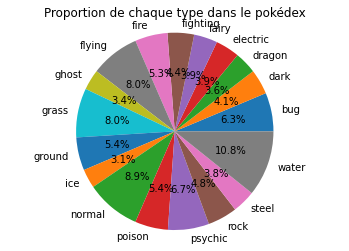

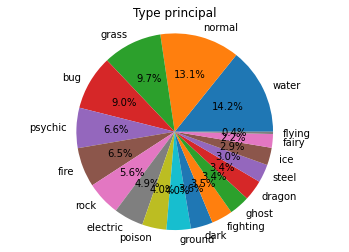

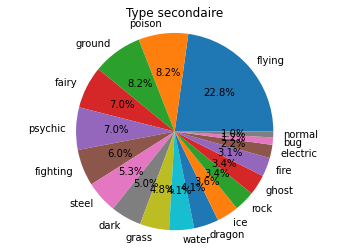

In [8]:
type_1_counts = data["type1"].value_counts()
type_2_counts = data["type2"].value_counts()

type_counts = type_1_counts + type_2_counts

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', radius=2)
plt.axis('equal')
plt.title("Proportion de chaque type dans le pokédex")
plt.show()


plt.pie(type_1_counts, labels=type_1_counts.index, autopct='%1.1f%%', radius=2)
plt.axis('equal')
plt.title("Type principal")
plt.show()


plt.pie(type_2_counts, labels=type_2_counts.index, autopct='%1.1f%%', radius=2)
plt.axis('equal')
plt.title("Type secondaire")
plt.show()

Index(['pokedex_number', 'name', 'type1', 'type2', 'abilities', 'attack',
       'defense', 'hp', 'sp_attack', 'sp_defense', 'speed', 'generation',
       'pokedex_number.1', '2016-11', '2016-12', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', 

In [12]:
data_types = data.drop(columns = ['name', 'abilities', 'attack', 'defense', 'hp',
            'sp_attack', 'sp_defense', 'speed', 'generation', 'pokedex_number'])
data_types.drop(columns = ['pokedex_number.1'], inplace = True) #Temporaire
data_types.head()

,type1,type2,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
0,grass,poison,0.00074,NaN,0.03461,0.02797,0.02382,0.02720,0.01682,0.01843,0.02595,0.03974,0.02511,0.02080,0.02069,0.02855,0.01648,0.02311,0.01988,0.01725,0.01794,0.02530,0.01559,0.01734,0.01399,0.03277,0.02829,0.02683,0.02314,0.02509,0.02230,0.01944,0.01551,0.02139,0.01650,0.02930,0.02045,0.02795,0.03789,0.03421,0.06302,0.05264,0.06056,0.02220,0.02383,0.04321,0.04417,0.03563,0.03771,0.02933,0.03967,0.02490,0.03527,0.02879,0.03378,0.03517,0.03760,0.03142,0.04389,0.05165,0.03082,0.03361,0.02527,0.03349,0.05667,0.01827,0.02346,0.01749,0.03871,0.01270,0.02207,0.02294,0.01961,0.03216,0.01220,0.01797,0.03031,0.02132,0.01944,0.03856,0.01575
1,grass,poison,0.00097,NaN,0.00877,0.01019,0.01065,0.01153,0.00646,0.01171,0.01033,0.01352,0.00891,0.01092,0.01086,0.00977,0.01123,0.01396,0.01542,0.01103,0.01656,0.01505,0.02054,0.01797,0.01732,0.02527,0.02354,0.02169,0.02175,0.01733,0.02847,0.02013,0.01734,0.01810,0.01273,0.02084,0.03239,0.04018,0.01329,0.02444,0.04198,0.05683,0.03729,0.01896,0.01197,0.01855,0.02084,0.01929,0.03040,0.01607,0.01510,0.02353,0.02183,0.04048,0.02217,0.02660,0.01288,0.01433,0.01507,0.01594,0.01158,0.02390,0.01316,0.03202,0.00558,0.05025,0.02307,0.03032,0.06745,0.02575,0.00910,0.00765,0.00792,0.00984,0.01017,0.00751,0.03697,0.01302,0.00499,0.00191,0.00463
2,grass,poison,0.04425,NaN,0.99016,0.97451,0.89342,1.12268,1.02873,0.89334,0.92881,0.97994,0.97703,0.80170,0.78573,0.94346,1.00323,0.98483,0.98212,0.99975,1.07955,0.93776,0.91757,0.97033,1.13316,1.15743,1.07120,1.23751,1.25630,1.09219,1.06142,1.07328,1.05697,1.11976,1.17002,1.42118,1.49850,1.60336,1.83298,1.74389,1.89236,1.74093,1.79848,1.84136,1.77656,1.76807,1.81651,1.84293,1.99035,2.00136,1.89255,1.88023,1.63743,1.56226,1.57472,1.49181,1.74601,1.82667,1.62228,1.84764,1.76369,1.60150,1.63142,1.73750,1.72326,1.64481,1.34682,1.33558,1.50314,1.36292,1.55990,1.34951,1.43368,1.89932,1.85906,1.24737,1.23153,1.30983,1.23125,1.18794,1.43387
3,fire,NaN,0.00051,NaN,0.01430,0.01304,0.01427,0.01086,0.01000,0.01514,0.01261,0.01057,0.00927,0.01097,0.00997,0.01325,0.00992,0.01472,0.00900,0.01034,0.00807,0.00828,0.00764,0.00666,0.00766,0.01697,0.00911,0.00626,0.00809,0.00769,0.00644,0.01105,0.00787,0.00762,0.00703,0.00696,0.00923,0.01120,0.01266,0.00911,0.02001,0.01635,0.01733,0.01353,0.00874,0.01688,0.01544,0.01351,0.01693,0.01739,0.02013,0.01259,0.00766,0.01568,0.01483,0.01086,0.01062,0.01091,0.01463,0.00781,0.01372,0.02195,0.00627,0.02486,0.02855,0.00933,0.00736,0.00972,0.00215,0.00688,0.00573,0.00401,0.00717,0.01444,0.00457,0.00536,0.03197,0.01191,0.00446,0.01258,0.01606
4,fire,NaN,0.00046,NaN,0.00891,0.01304,0.01270,0.00729,0.00922,0.01323,0.01116,0.01453,0.01008,0.00871,0.01030,0.01036,0.00940,0.00930,0.01030,0.00619,0.00674,0.00762,0.00764,0.00542,0.00653,0.00915,0.01037,0.01412,0.00796,0.00632,0.00453,0.00946,0.00708,0.00562,0.00631,0.00564,0.00718,0.01010,0.01484,0.00889,0.01564,0.01232,0.01614,0.00721,0.00531,0.02110,0.00777,0.01400,0.01809,0.01032,0.02146,0.01272,0.01084,0.03662,0.01175,0.01345,0.01010,0.01042,0.00635,0.00515,0.00980,0.01399,0.01712,0.01053,0.01116,0.02798,0.00557,0.00330,0.00215,0.00459,0.00236,0.00612,0.00660,0.00547,0.00254,0.00483,0.00300,0.00471,0.00158,0.06208,0.02162


In [17]:
data_left = data_types.drop(columns=["type2"])
data_right = data_types.drop(columns=["type1"])
data_right.dropna(axis=0, subset=['type2'], inplace=True)

data_left.rename(columns={"type1" : "type"}, inplace=True)
data_right.rename(columns={"type2" : "type"}, inplace=True)

data_types = pd.concat([data_left, data_right], ignore_index=True)

In [18]:
print(data_types.shape)
data_types.head()

(1218, 80)


,type,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
0,grass,0.00074,NaN,0.03461,0.02797,0.02382,0.02720,0.01682,0.01843,0.02595,0.03974,0.02511,0.02080,0.02069,0.02855,0.01648,0.02311,0.01988,0.01725,0.01794,0.02530,0.01559,0.01734,0.01399,0.03277,0.02829,0.02683,0.02314,0.02509,0.02230,0.01944,0.01551,0.02139,0.01650,0.02930,0.02045,0.02795,0.03789,0.03421,0.06302,0.05264,0.06056,0.02220,0.02383,0.04321,0.04417,0.03563,0.03771,0.02933,0.03967,0.02490,0.03527,0.02879,0.03378,0.03517,0.03760,0.03142,0.04389,0.05165,0.03082,0.03361,0.02527,0.03349,0.05667,0.01827,0.02346,0.01749,0.03871,0.01270,0.02207,0.02294,0.01961,0.03216,0.01220,0.01797,0.03031,0.02132,0.01944,0.03856,0.01575
1,grass,0.00097,NaN,0.00877,0.01019,0.01065,0.01153,0.00646,0.01171,0.01033,0.01352,0.00891,0.01092,0.01086,0.00977,0.01123,0.01396,0.01542,0.01103,0.01656,0.01505,0.02054,0.01797,0.01732,0.02527,0.02354,0.02169,0.02175,0.01733,0.02847,0.02013,0.01734,0.01810,0.01273,0.02084,0.03239,0.04018,0.01329,0.02444,0.04198,0.05683,0.03729,0.01896,0.01197,0.01855,0.02084,0.01929,0.03040,0.01607,0.01510,0.02353,0.02183,0.04048,0.02217,0.02660,0.01288,0.01433,0.01507,0.01594,0.01158,0.02390,0.01316,0.03202,0.00558,0.05025,0.02307,0.03032,0.06745,0.02575,0.00910,0.00765,0.00792,0.00984,0.01017,0.00751,0.03697,0.01302,0.00499,0.00191,0.00463
2,grass,0.04425,NaN,0.99016,0.97451,0.89342,1.12268,1.02873,0.89334,0.92881,0.97994,0.97703,0.80170,0.78573,0.94346,1.00323,0.98483,0.98212,0.99975,1.07955,0.93776,0.91757,0.97033,1.13316,1.15743,1.07120,1.23751,1.25630,1.09219,1.06142,1.07328,1.05697,1.11976,1.17002,1.42118,1.49850,1.60336,1.83298,1.74389,1.89236,1.74093,1.79848,1.84136,1.77656,1.76807,1.81651,1.84293,1.99035,2.00136,1.89255,1.88023,1.63743,1.56226,1.57472,1.49181,1.74601,1.82667,1.62228,1.84764,1.76369,1.60150,1.63142,1.73750,1.72326,1.64481,1.34682,1.33558,1.50314,1.36292,1.55990,1.34951,1.43368,1.89932,1.85906,1.24737,1.23153,1.30983,1.23125,1.18794,1.43387
3,fire,0.00051,NaN,0.01430,0.01304,0.01427,0.01086,0.01000,0.01514,0.01261,0.01057,0.00927,0.01097,0.00997,0.01325,0.00992,0.01472,0.00900,0.01034,0.00807,0.00828,0.00764,0.00666,0.00766,0.01697,0.00911,0.00626,0.00809,0.00769,0.00644,0.01105,0.00787,0.00762,0.00703,0.00696,0.00923,0.01120,0.01266,0.00911,0.02001,0.01635,0.01733,0.01353,0.00874,0.01688,0.01544,0.01351,0.01693,0.01739,0.02013,0.01259,0.00766,0.01568,0.01483,0.01086,0.01062,0.01091,0.01463,0.00781,0.01372,0.02195,0.00627,0.02486,0.02855,0.00933,0.00736,0.00972,0.00215,0.00688,0.00573,0.00401,0.00717,0.01444,0.00457,0.00536,0.03197,0.01191,0.00446,0.01258,0.01606
4,fire,0.00046,NaN,0.00891,0.01304,0.01270,0.00729,0.00922,0.01323,0.01116,0.01453,0.01008,0.00871,0.01030,0.01036,0.00940,0.00930,0.01030,0.00619,0.00674,0.00762,0.00764,0.00542,0.00653,0.00915,0.01037,0.01412,0.00796,0.00632,0.00453,0.00946,0.00708,0.00562,0.00631,0.00564,0.00718,0.01010,0.01484,0.00889,0.01564,0.01232,0.01614,0.00721,0.00531,0.02110,0.00777,0.01400,0.01809,0.01032,0.02146,0.01272,0.01084,0.03662,0.01175,0.01345,0.01010,0.01042,0.00635,0.00515,0.00980,0.01399,0.01712,0.01053,0.01116,0.02798,0.00557,0.00330,0.00215,0.00459,0.00236,0.00612,0.00660,0.00547,0.00254,0.00483,0.00300,0.00471,0.00158,0.06208,0.02162


In [20]:
data_types = data_types.groupby(by='type').agg(np.sum)

print(data_types.shape)
data_types.head()

(18, 79)


,2016-11,2016-12,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06
type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bug,58.75320,45.41937,38.98597,40.72197,27.73647,26.21577,22.44473,21.28264,22.00342,22.47100,22.64335,23.20370,22.81848,23.04171,23.22913,24.06647,23.44957,23.55866,23.63651,22.98446,22.67433,22.65759,23.66473,23.31085,22.17353,22.95028,23.13654,23.27290,23.19594,22.97459,22.11541,21.83465,21.95137,23.45503,23.85114,24.76538,27.24115,26.03623,27.90784,26.20223,25.96980,25.35303,25.80020,25.26991,25.02861,24.43647,24.42859,25.78225,25.69676,25.33219,25.17769,26.07104,26.33148,25.80709,25.83584,26.42791,25.44704,25.80682,25.40052,25.97273,26.49515,25.41469,26.24497,25.17689,24.07377,23.00941,22.28339,21.87329,23.13610,23.76042,22.91230,25.08930,25.21184,25.32659,23.78013,24.21135,26.28010,24.45212,25.26760
dark,25.58622,21.35305,32.27271,34.26951,37.74561,36.57863,37.79215,37.51801,37.34190,36.91241,35.69238,37.18154,36.18680,34.94835,34.27087,35.67140,35.93948,35.74725,36.33091,35.71410,34.95756,34.88831,32.82557,32.25492,32.85663,32.40089,33.24161,33.22671,33.42520,32.30524,32.46176,32.28658,32.33581,32.44424,33.12576,33.55447,35.90850,36.01697,35.61958,35.49394,34.87897,34.36113,33.63707,34.13881,34.26133,34.15849,34.97992,35.70389,35.31086,34.90533,36.33530,36.02950,37.14306,36.57126,35.97903,35.23995,34.58445,35.43631,34.38402,34.12917,34.13999,33.71306,33.36543,32.92736,33.18735,32.33597,33.10650,33.18989,31.92130,33.73710,32.60333,34.82014,32.29584,31.73666,31.40811,33.92540,32.56244,31.47091,49.44012
dragon,44.76312,43.96656,43.70788,44.09414,46.10297,47.07782,49.79042,46.56547,45.31725,45.34361,45.50958,40.40063,41.96539,40.41351,39.53168,39.57261,39.76770,38.39790,39.38098,37.83143,39.29448,38.36929,37.33705,38.04757,38.14819,31.38550,30.88918,32.05924,34.47161,34.37425,33.58980,33.46450,33.43913,33.35271,33.56859,34.60594,36.41376,36.04208,36.04209,35.31295,35.62765,35.28780,35.21327,36.01736,35.57585,34.25208,36.45188,36.03250,35.66446,36.13828,35.04296,34.19389,35.11384,35.37531,34.56359,34.98063,33.29229,33.61269,33.35982,32.42043,32.71952,33.39773,32.56729,32.12217,32.28434,32.01195,32.51758,32.50262,31.35314,31.34281,31.89886,33.01625,33.24758,32.34747,34.06502,33.38207,33.63452,32.42450,33.20525
electric,26.67210,32.25335,28.79598,27.92926,27.38088,26.99659,24.49814,22.96967,23.82323,24.69726,24.60272,22.69982,23.74536,25.56994,26.76683,26.88454,26.48686,25.88918,25.13887,23.02438,22.66740,24.44039,25.16224,25.39965,24.46444,25.63177,25.47943,25.45029,25.31483,25.43095,25.78473,24.98528,24.80497,25.07229,25.34384,24.82056,24.93170,25.03392,25.06567,25.17993,24.78522,23.87637,23.92544,23.81506,23.99933,24.20936,24.33456,25.45828,25.11463,24.78297,25.33990,25.08709,25.62268,25.34591,25.45997,24.44822,23.92580,23.64546,23.77175,24.47244,24.56238,24.54315,24.71043,24.62015,22.84643,23.24619,22.59932,22.10962,23.45372,23.65570,23.74536,23.98012,23.67782,22.99914,22.52827,22.85001,22.88106,22.99808,22.67197
fairy,43.07251,46.83439,33.59314,30.31793,32.89943,33.81081,35.50176,38.37932,38.83758,36.86263,36.39022,37.08599,37.63260,37.55391,36.68923,36.81748,37.34580,38.92492,38.88962,38.42334,37.27063,36.51063,36.50076,37.95819,36.86987,35.94311,36.71951,36.63786,36.65220,37.35898,38.38794,38.50166,36.55589,35.46414,35.48564,35.63366,36.44777,36.40340,35.74394,36.98406,37.27156,37.90844,38.04028,37.15925,36.41640,37.

D:\Anaconda\envs\IML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


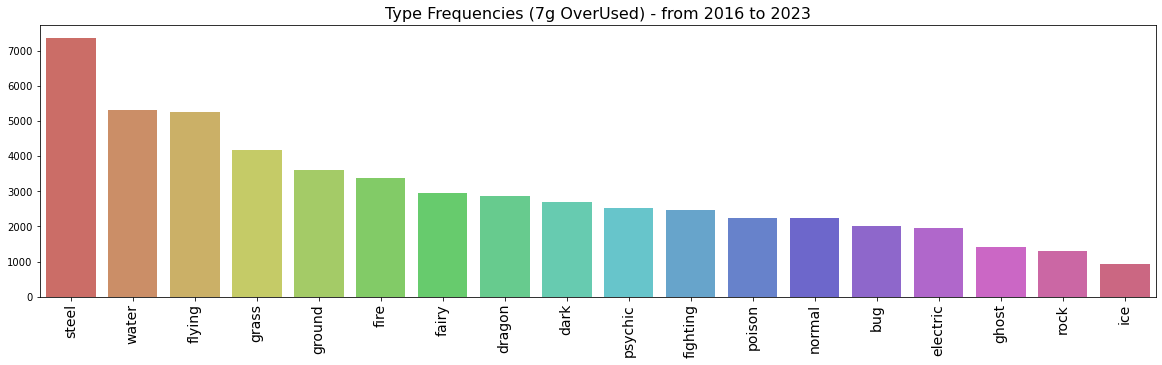

In [27]:
import seaborn as sns

#Affichage des types les plus fréquents
def frequency_barplot(df):
    fig, ax = plt.subplots(1,1,figsize=(20,5))
    
    #Notons que la fonction trie le dataframe !
    df.sort_values(ascending=False, inplace = True)
    sns.barplot(list(range(df.shape[0])), df.values, palette='hls', ax=ax)

    ax.set_xticks(list(range(df.shape[0])))
    ax.set_xticklabels(df.index, fontsize=14, rotation=90)
    return ax

#requiert un df en mode "types = colonnes"

#On va compter les occurences en sommant les apparitions de chaque mot dans TOUS les documents du corpus
count = data_types.T.sum()

#Puis faire appel à notre fonction d'affichage pour représenter le résultat obtenu
ax = frequency_barplot(count)
ax.set_title("Type Frequencies (7g OverUsed) - from 2016 to 2023", fontsize=16);

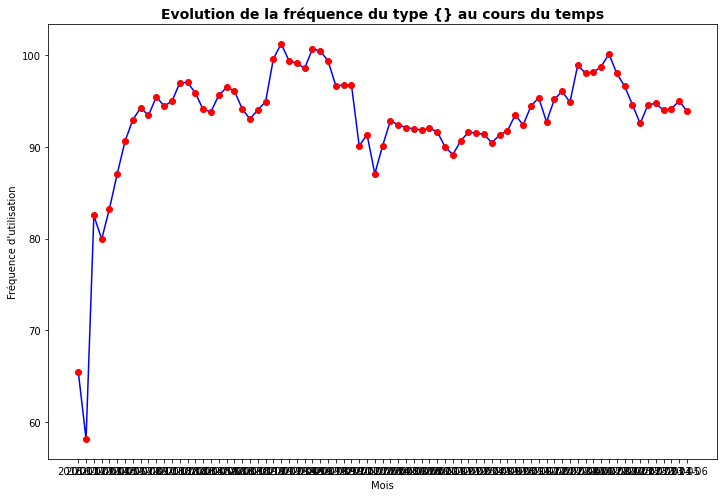

In [35]:
def frequence_plot(df):
    plt.figure(figsize=(12, 8))
    plt.plot(df, 'b', df, 'ro')
    plt.xlabel('Mois')
    plt.ylabel("Fréquence d'utilisation")
    plt.title('Evolution de la fréquence du type {} au cours du temps', fontsize=14, fontweight='bold')
    plt.show()
    return

temp = data_types.loc["steel"]

frequence_plot(temp)